In [1]:
using Plots, Distributions, Random, Statistics
gr(fmt = :png, size = (900, 500))

Plots.GRBackend()

In [2]:
function ksl(distribution, n = 100)
    title = nameof(typeof(distribution))
    observations = rand(distribution, n)
    sample_means = cumsum(observations) ./ (1:n)
    μ = mean(distribution)
    plot(repeat((1:n)', 2), [zeros(1, n); observations'], label = "", color = :grey, alpha = 0.5)
    plot!(1:n, observations, color = :grey, markershape = :circle, alpha = 0.5, label = "", linewidth = 0)
    if !isnan(μ)
    hline!([μ], color = :black, linewidth = 1.5, linestyle = :dash, grid = false,
                  label = ["Mean"])
    end
    plot!(1:n, sample_means, linewidth = 3, alpha = 0.6, color = :green, label = "Sample mean")
    return plot!(title = title)
end

ksl (generic function with 2 methods)

In [3]:
distributions = [TDist(10), Beta(2, 2), Gamma(5, 2), Poisson(4), LogNormal(0.5), Exponential(1)]
Random.seed!(0);

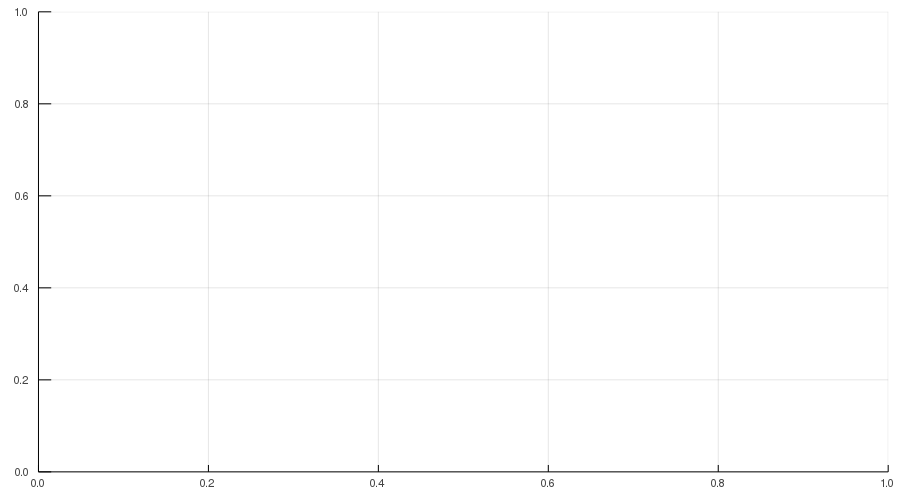

In [4]:
plot()

  0.085089 seconds (241.03 k allocations: 15.962 MiB, 8.73% gc time)


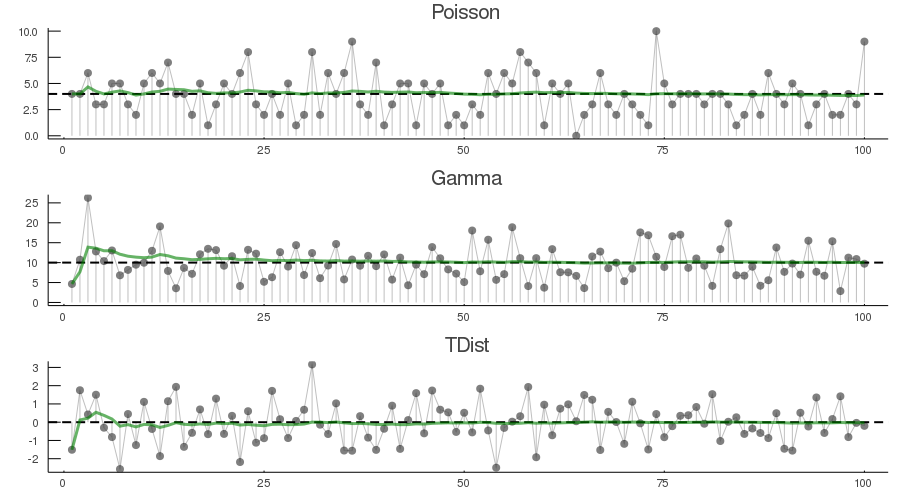

In [14]:
@time plot(ksl.(sample(distributions, 3, replace = false))..., layout = (3, 1), legend = false)

  0.045518 seconds (108.61 k allocations: 7.200 MiB)


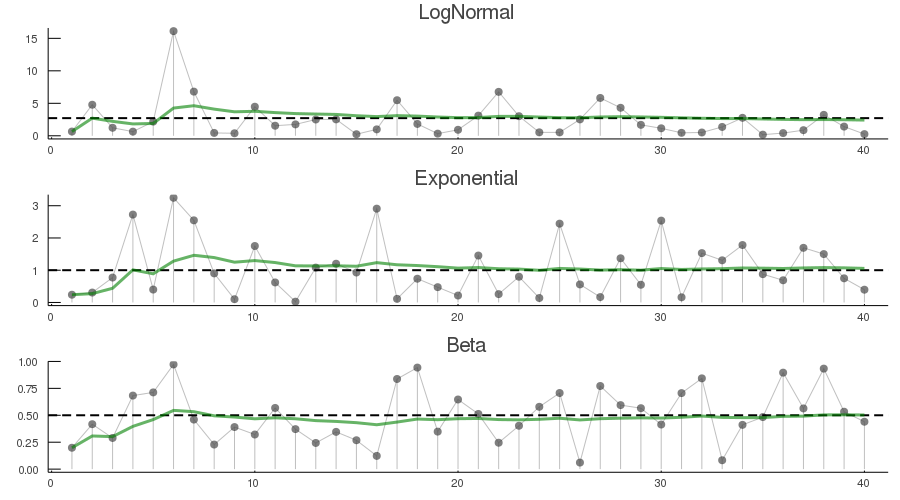

In [21]:
@time plot(ksl.(sample(distributions, 3, replace = false), 40)..., layout = (3, 1), legend = false)